Text Classification using BERT Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
class_dict = {
    'ham': 0,
    'spam':1
}

df['target'] = df['target'].map(class_dict)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

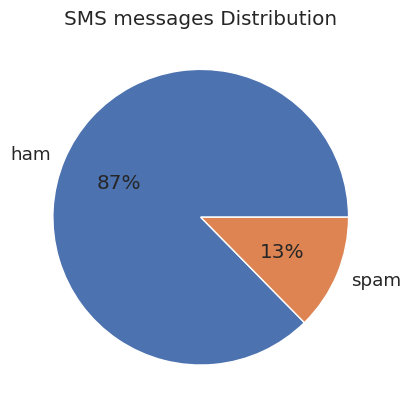

In [ ]:
sms = pd.value_counts(df["target"], sort=True)
sms.plot(kind="pie", labels=["ham", "spam"], autopct="%1.0f%%")

plt.title("SMS messages Distribution")
plt.ylabel("")
plt.show()

# Text Pre-processing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [ ]:
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(stemmer)

df.head()

,target,text,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkt st m...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61


In [ ]:
print(df['text'].apply(lambda x: len(x.split(' '))).sum())

45463


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'],
                                                    stratify=df['target'],
                                                    test_size=0.3)

# BERT

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
weights = compute_class_weight(class_weight='balanced',
                                 classes=np.unique(y_train),
                                 y=y_train)

class_weight = {0: weights[0], 1: weights[1]}


print(class_weight)

{0: 0.5722872508699779, 1: 3.9584245076586435}


In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def bert_encode(input_text, max_len):
    tokens = tokenizer.batch_encode_plus(
        input_text.tolist(),
            add_special_tokens = True,
            truncation=True,
            max_length = max_len,
            padding = True,
            return_attention_mask = True,
    )
    return tf.convert_to_tensor(tokens['input_ids']), tf.convert_to_tensor(tokens['attention_mask'])


In [ ]:
train_input_ids, train_attention_masks = bert_encode(X_train, 65)
test_input_ids, test_attention_masks = bert_encode(X_test, 65)

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

class BertSequenceClassifier(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super().__init__(**kwargs)
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert_model([input_ids, attention_mask])
        return output[0]

def create_model(bert_model):
    input_ids_placeholder = tf.keras.layers.Input(shape=(65,), dtype='int32', name='input_ids')
    attention_masks_placeholder = tf.keras.layers.Input(shape=(65,), dtype='int32', name='attention_mask')

    bert_layer = BertSequenceClassifier(bert_model)
    output = bert_layer([input_ids_placeholder, attention_masks_placeholder])

    output = tf.keras.layers.Dense(32, activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

    model = tf.keras.models.Model(inputs=[input_ids_placeholder, attention_masks_placeholder], outputs=output)
    model.compile(Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

model = create_model(bert_model)
model.summary()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 65)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 65)]                 0         []                            
 )                                                                                                
                                                                                                  
 bert_sequence_classifier (  (None, 2)                    1094837   ['input_ids[0][0]',           
 BertSequenceClassifier)                                  78         'attention_mask[0][0]']      
                                                                                            

In [ ]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    epochs = 10,
    batch_size = 10,
    validation_data=([test_input_ids, test_attention_masks], y_test),
    class_weight=class_weight
)

Epoch 1/10
362/362 [==============================] - 73s 201ms/step - loss: 0.1304 - accuracy: 0.9458 - val_loss: 0.0935 - val_accuracy: 0.9826
Epoch 2/10
362/362 [==============================] - 71s 197ms/step - loss: 0.1073 - accuracy: 0.9538 - val_loss: 0.0709 - val_accuracy: 0.9884
Epoch 3/10
362/362 [==============================] - 71s 196ms/step - loss: 0.0944 - accuracy: 0.9555 - val_loss: 0.0667 - val_accuracy: 0.9877
Epoch 4/10
362/362 [==============================] - 70s 195ms/step - loss: 0.0797 - accuracy: 0.9621 - val_loss: 0.0615 - val_accuracy: 0.9871
Epoch 5/10
362/362 [==============================] - 69s 191ms/step - loss: 0.0668 - accuracy: 0.9754 - val_loss: 0.0732 - val_accuracy: 0.9839
Epoch 6/10
362/362 [==============================] - 70s 194ms/step - loss: 0.0511 - accuracy: 0.9779 - val_loss: 0.0570 - val_accuracy: 0.9871
Epoch 7/10
362/362 [==============================] - 70s 194ms/step - loss: 0.0416 - accuracy: 0.9823 - val_loss: 0.0683 - val_ac

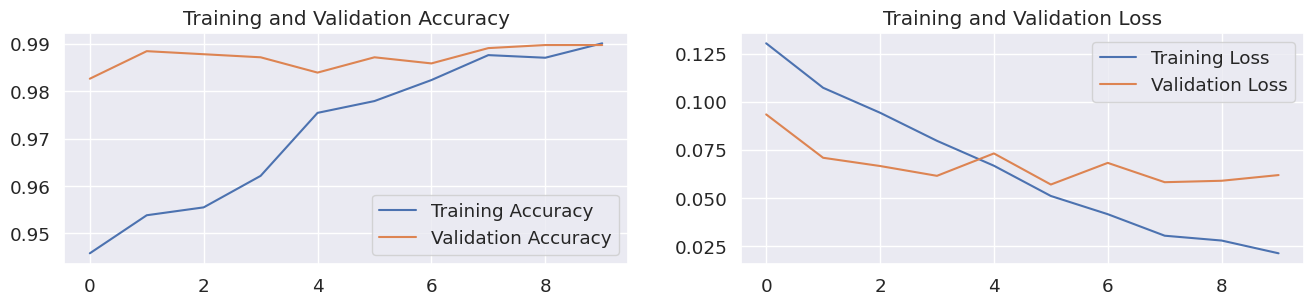

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.savefig('graph4_97_final.jpg')
plt.show()

# Model Prediction

In [ ]:
y_predicted = model.predict([test_input_ids, test_attention_masks])
y_predicted = y_predicted.flatten()

49/49 [==============================] - 16s 150ms/step


In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[1350,    5],
       [  11,  185]])

Text(88.25, 0.5, 'Truth')

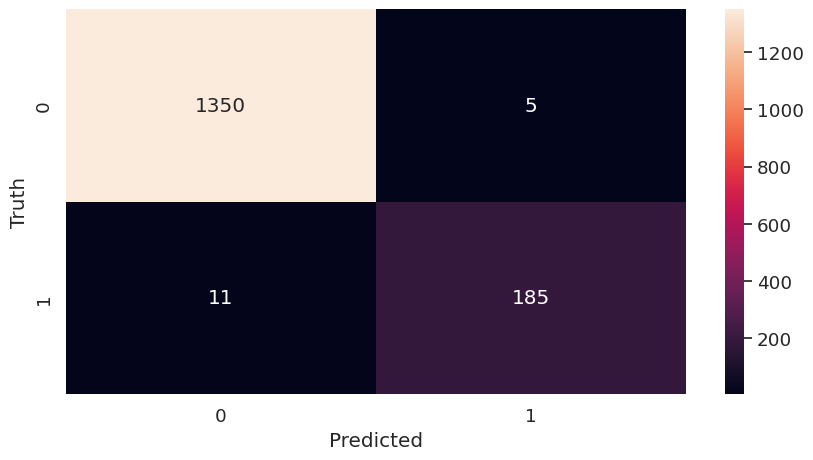

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1355
           1       0.97      0.94      0.96       196

    accuracy                           0.99      1551
   macro avg       0.98      0.97      0.98      1551
weighted avg       0.99      0.99      0.99      1551

